In [12]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

import lovely_tensors as lt
lt.monkey_patch()
print(torch.__version__)
print(torchaudio.__version__)


1.12.1+cu113
0.12.1+cu113


In [3]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

In [4]:
torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

100%|██████████| 106k/106k [00:00<00:00, 315kB/s] 


In [5]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    # 초 단위로 변경
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

In [26]:
SPEECH_WAVEFORM

tensor[1, 54400] x∈[-1.000, 0.668] μ=2.050e-05 σ=0.122

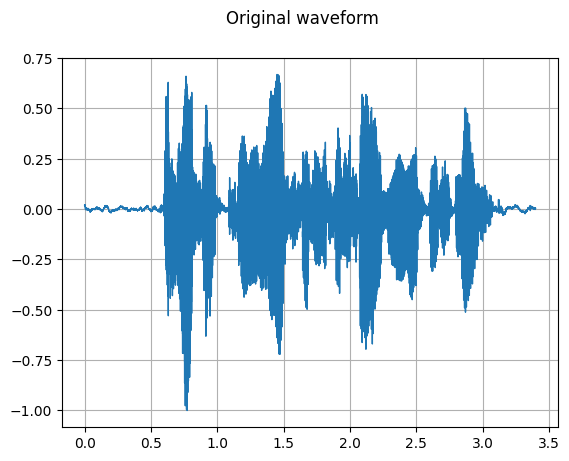

In [7]:
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)

plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Original waveform")
Audio(SPEECH_WAVEFORM.numpy(), rate=SAMPLE_RATE)

In [8]:
n_fft = 1024
win_length = None
hop_length = 512

# power = 2.0이 default
spectrogram = T.Spectrogram(n_fft=n_fft, win_length=win_length, hop_length=hop_length,
                            center=True, pad_mode='reflect', power=2.0)

In [9]:
spec = spectrogram(SPEECH_WAVEFORM)

In [22]:
spec

tensor[1, 513, 107] n=54891 x∈[2.600e-10, 4.001e+03] μ=5.726 σ=70.301

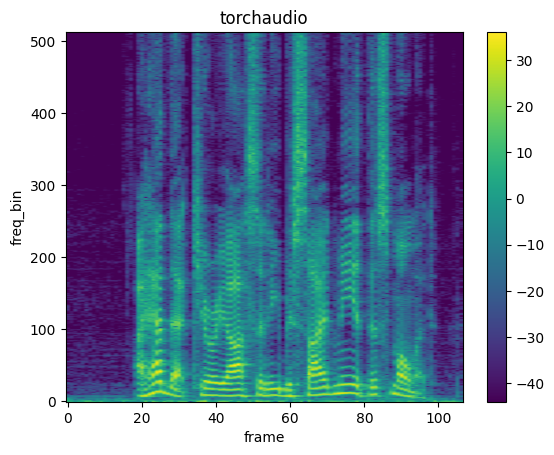

In [23]:
plot_spectrogram(spec[0], title='torchaudio')

In [24]:
torch.random.manual_seed(0)
n_fft = 1024
win_length = None
hop_length = 512

spec = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)(SPEECH_WAVEFORM)

In [27]:
griffin_lim = T.GriffinLim(n_fft=n_fft, win_length=win_length, hop_length=hop_length)

In [29]:
reconstructed_waveform = griffin_lim(spec)
reconstructed_waveform 

tensor[1, 54272] x∈[-0.885, 0.942] μ=0.003 σ=0.120

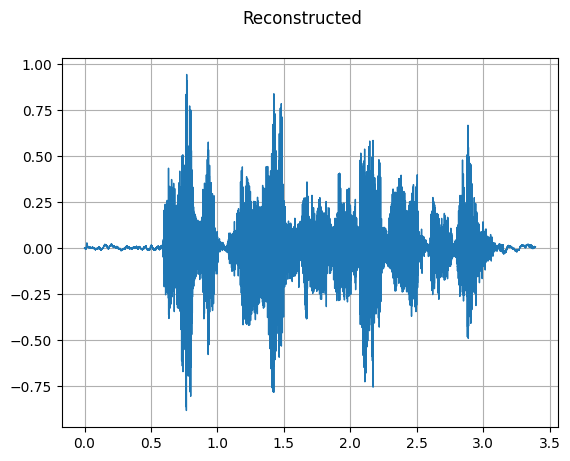

In [30]:
plot_waveform(reconstructed_waveform, SAMPLE_RATE, title="Reconstructed")
Audio(reconstructed_waveform, rate=SAMPLE_RATE)

In [31]:
n_fft = 256
n_mels = 64
sample_rate = 6000

mel_filters = F.melscale_fbanks(int(n_fft // 2 + 1), n_mels=n_mels, f_min=0.0,
                                f_max=sample_rate / 2.0, sample_rate=sample_rate,
                                norm='slaney')

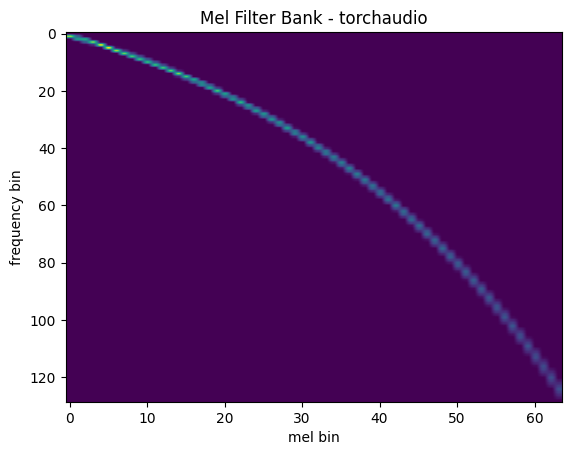

In [32]:
plot_fbank(mel_filters, "Mel Filter Bank - torchaudio")

In [33]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)
melspec = mel_spectrogram(SPEECH_WAVEFORM)

In [34]:
melspec

tensor[1, 128, 107] n=13696 x∈[1.273e-07, 455.871] μ=1.952 σ=14.246

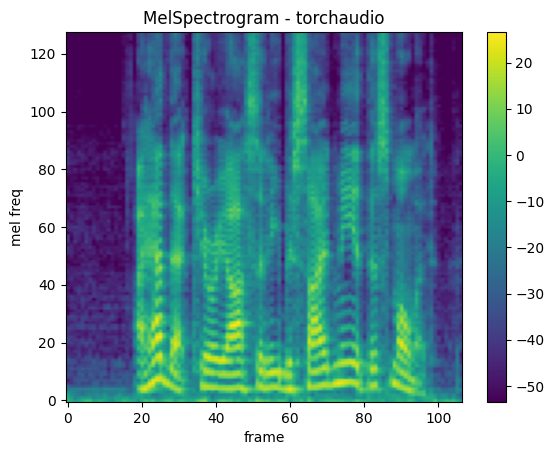

In [35]:
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")